Setup & Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
%matplotlib inline

Load the Data/csv

In [16]:
df_raw = pd.read_csv('../data/row/solar-measurements_togo-dapaong_qc.csv', encoding='ISO-8859-1', low_memory=False)
print(df_raw['Timestamp'].head(10))

0    yyyy-mm-dd hh:mm
1    2021-10-25 00:01
2    2021-10-25 00:02
3    2021-10-25 00:03
4    2021-10-25 00:04
5    2021-10-25 00:05
6    2021-10-25 00:06
7    2021-10-25 00:07
8    2021-10-25 00:08
9    2021-10-25 00:09
Name: Timestamp, dtype: object


In [17]:
df = pd.read_csv("../data/row/solar-measurements_togo-dapaong_qc.csv", encoding='ISO-8859-1')

# Drop the first row (units) and reset index
df = df.drop(index=0).copy()
df.reset_index(drop=True, inplace=True)

# Convert to appropriate data types
numeric_columns = [
    "GHI", "DNI", "DHI", "ModA", "ModB", "Tamb", "RH", "WS", "WSgust",
    "WSstdev", "WD", "WDstdev", "BP", "Precipitation", "TModA", "TModB"
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df["Cleaning"] = pd.to_numeric(df["Cleaning"], errors='coerce')
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')

# Drop empty column
df.drop(columns=["Comments"], inplace=True)

df.head()


C:\Users\Tinsae D.D\AppData\Local\Temp\ipykernel_25820\3594437657.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/row/solar-measurements_togo-dapaong_qc.csv", encoding='ISO-8859-1')


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,GHIrsi
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,0
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,0
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,0
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,0
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,0


Summary Statistics & Missing Values

In [18]:
print("Summary Statistics:")
display(df[numeric_columns].describe())

print("\nMissing Values:")
missing = df.isna().sum()
display(missing[missing > 0])

print("\nColumns with >5% Missing:")
threshold = 0.05 * len(df)
display(missing[missing > threshold])


Summary Statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.001382,32.444403,33.543330
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.026350,10.998334,12.769277
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,13.100000,13.100000
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,23.900000,23.600000
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,28.400000,28.400000
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,40.600000,43.000000
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,2.300000,70.400000,94.600000



Missing Values:


Series([], dtype: int64)


Columns with >5% Missing:


Series([], dtype: int64)

Outlier Detection & Basic Cleaning
Z-scores & Flag Outliers computing

In [19]:
z_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
z_scores = df[z_cols].apply(zscore)
outliers = (np.abs(z_scores) > 3)
print("Outliers detected per column (|Z| > 3):")
display(outliers.sum())

Outliers detected per column (|Z| > 3):


GHI        305
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64

Data Cleaning - Impute or DropHandle Missing Values (Median Impute)


In [20]:
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
df.dropna(subset=["Timestamp", "Cleaning"], inplace=True)

Export Cleaned Data

In [21]:
os.makedirs("data", exist_ok=True)
df.to_csv("data/togo_clean.csv", index=False)
print("Cleaned CSV saved to data/togo_clean.csv")

Cleaned CSV saved to data/togo_clean.csv


Time Series Analysis

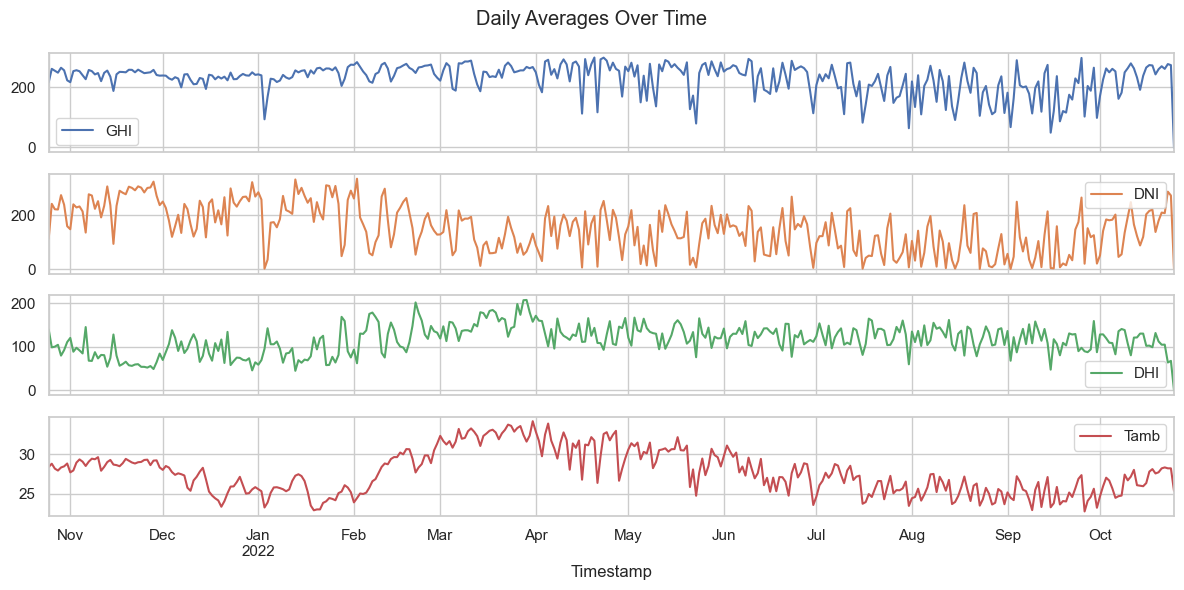

In [22]:
# Cell 7: Time Series Plots
df.set_index("Timestamp")[["GHI", "DNI", "DHI", "Tamb"]].resample("D").mean().plot(subplots=True, title="Daily Averages Over Time")
plt.tight_layout()
plt.show()

 Cleaning Impact on ModA & ModB

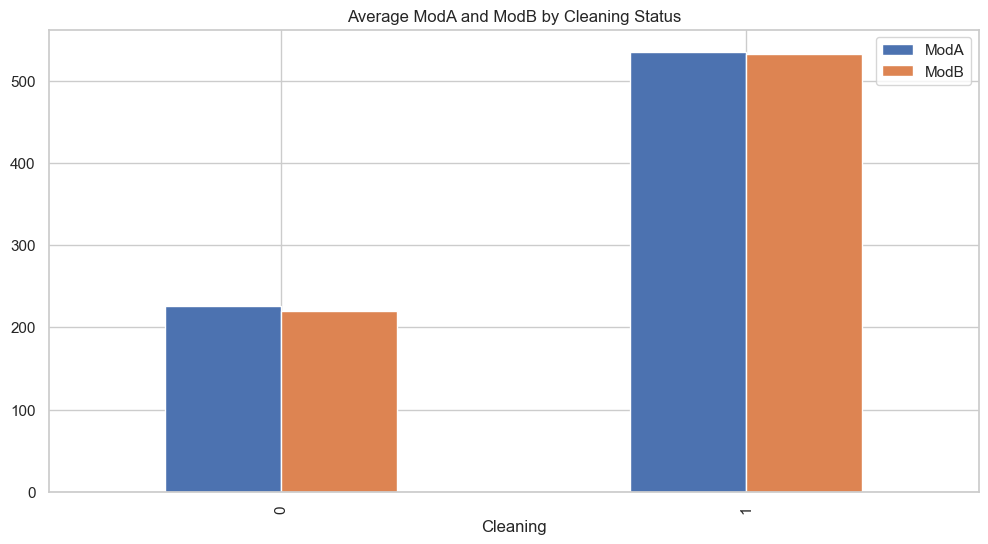

In [23]:
df.groupby("Cleaning")[["ModA", "ModB"]].mean().plot(kind='bar', title="Average ModA and ModB by Cleaning Status")
plt.show()

Correlation & Relationships

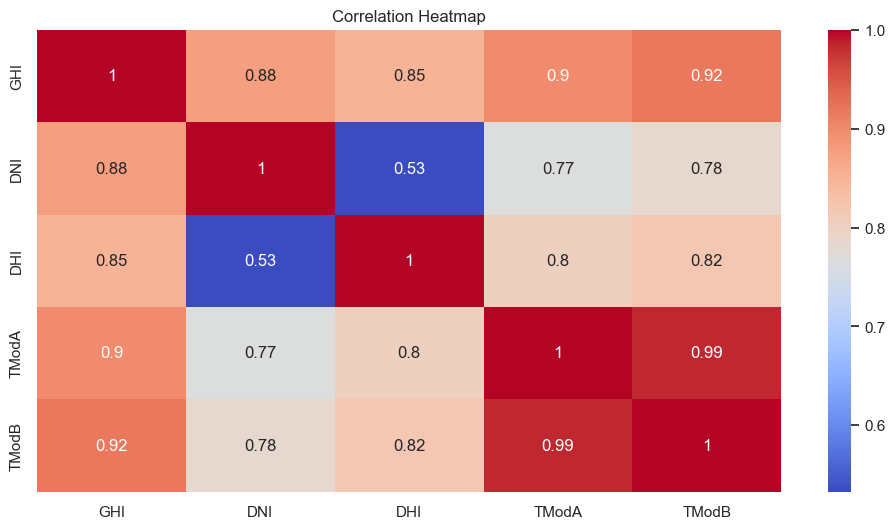

In [24]:
# Cell 9: Correlation Heatmap
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

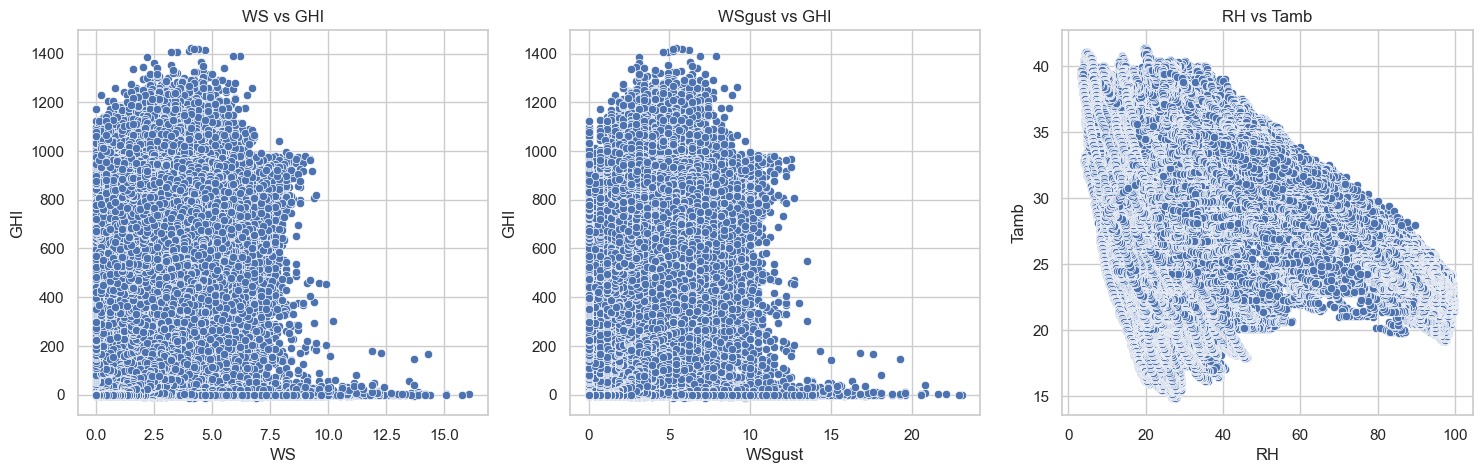

In [25]:
# Cell 10: Scatter Plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=df, x="WS", y="GHI", ax=axs[0])
sns.scatterplot(data=df, x="WSgust", y="GHI", ax=axs[1])
sns.scatterplot(data=df, x="RH", y="Tamb", ax=axs[2])
axs[0].set_title("WS vs GHI")
axs[1].set_title("WSgust vs GHI")
axs[2].set_title("RH vs Tamb")
plt.show()

Wind & Distribution Analysis

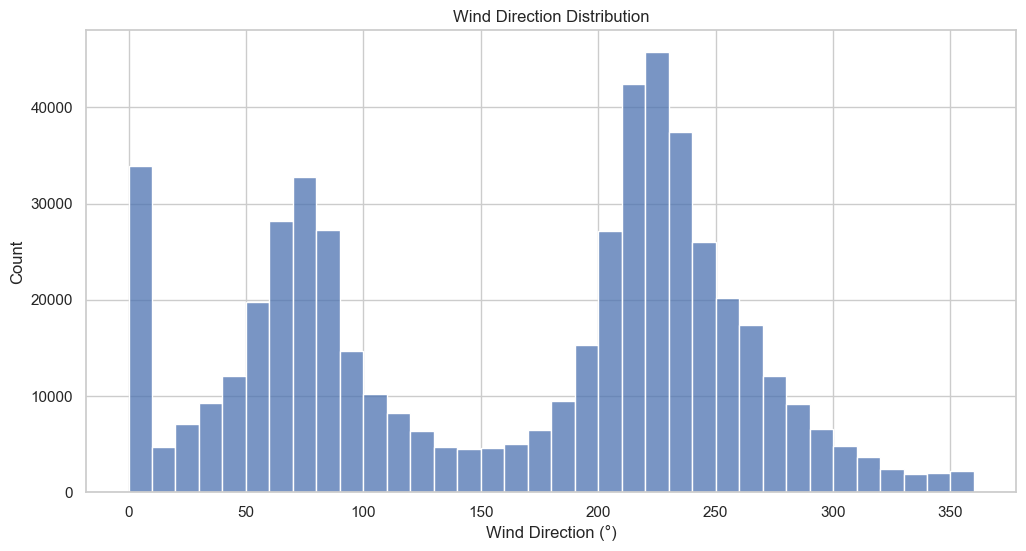

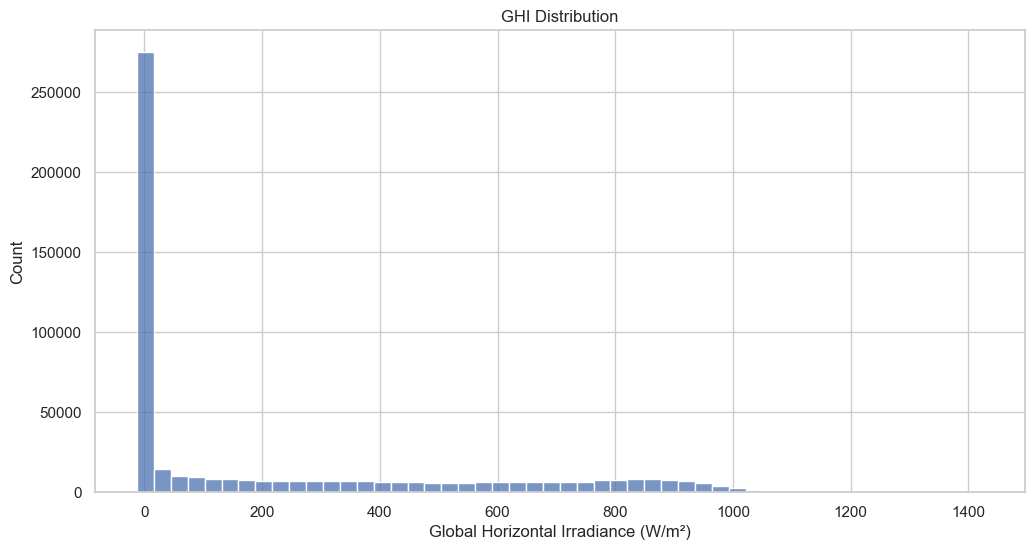

In [26]:
# Cell 11: Wind Distribution & Histogram
sns.histplot(df["WD"], bins=36, kde=False)
plt.title("Wind Direction Distribution")
plt.xlabel("Wind Direction (°)")
plt.show()

sns.histplot(df["GHI"], bins=50)
plt.title("GHI Distribution")
plt.xlabel("Global Horizontal Irradiance (W/m²)")
plt.show()

Temperature Analysis (RH Influence)

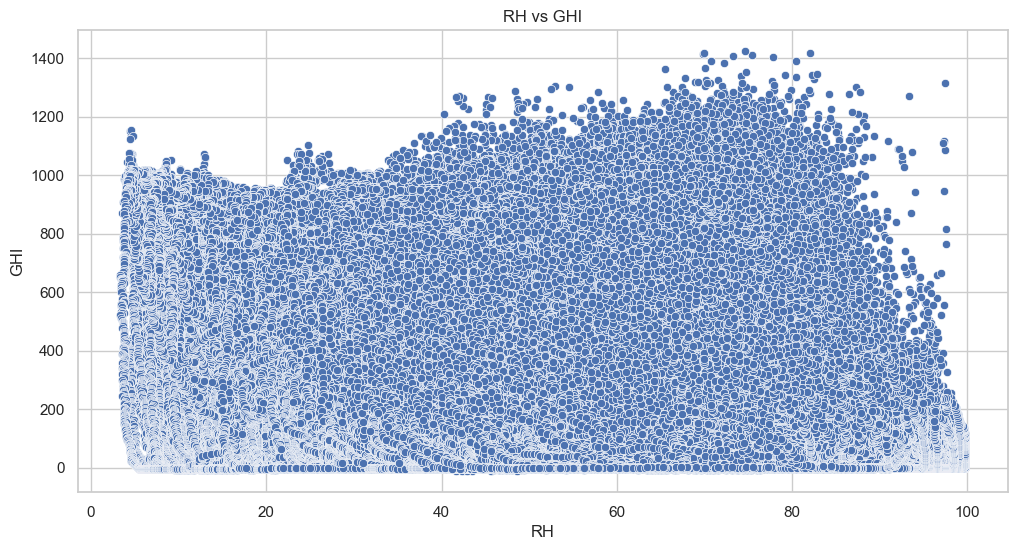

In [27]:
sns.scatterplot(data=df, x='RH', y='GHI')
plt.title("RH vs GHI")
plt.show()

Bubble Chart (Multi-variable Viz)

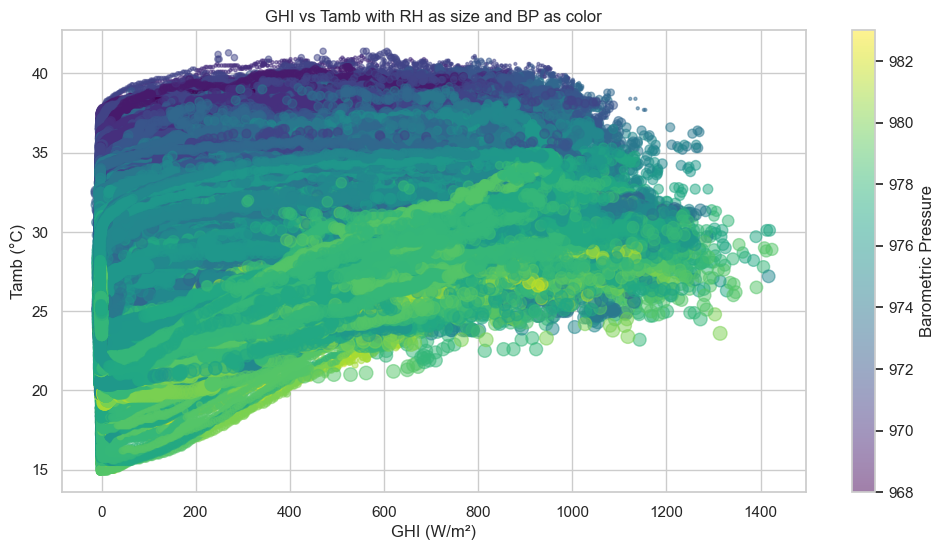

In [28]:
# Cell 12: Bubble Chart
plt.scatter(df["GHI"], df["Tamb"], s=df["RH"], alpha=0.5, c=df["BP"], cmap="viridis")
plt.colorbar(label="Barometric Pressure")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Tamb (°C)")
plt.title("GHI vs Tamb with RH as size and BP as color")
plt.show()